In [19]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()

In [22]:
data = pd.read_csv('card transactions.csv')

In [23]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [24]:
print(mem_usage(data))

39.51 MB


In [25]:
data.shape

(96753, 18)

In [26]:
data.describe(include='all')

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
count,96753.000000,9.675300e+04,96753,93378,96753,95558,92097.000000,96753,9.675300e+04,96753.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,365,13091,13126,227,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2/28/10,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,684,9310,1688,12035,NaN,96398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,48377.000000,5.142202e+09,NaN,NaN,NaN,NaN,44706.596740,NaN,4.278857e+02,0.010945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,27930.329635,5.567084e+04,NaN,NaN,NaN,NaN,28369.537945,NaN,1.000614e+04,0.104047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,5.142110e+09,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000e-02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,24189.000000,5.142152e+09,NaN,NaN,NaN,NaN,20855.000000,NaN,3.348000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,48377.000000,5.142196e+09,NaN,NaN,NaN,NaN,38118.000000,NaN,1.379800e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,72565.000000,5.142246e+09,NaN,NaN,NaN,NaN,63103.000000,NaN,4.282000e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
data.dtypes

Recnum                 int64
Cardnum                int64
Date                  object
Merchnum              object
Merch description     object
Merch state           object
Merch zip            float64
Transtype             object
Amount               float64
Fraud                  int64
Unnamed: 10          float64
Unnamed: 11          float64
Unnamed: 12          float64
Unnamed: 13          float64
Unnamed: 14          float64
Unnamed: 15          float64
Unnamed: 16          float64
Unnamed: 17          float64
dtype: object

In [28]:
data['date'] = pd.to_datetime(data['Date'], format = "%m/%d/%y")
# data['dob'] = pd.to_datetime(data['dob'], format = "%Y%m%d")

In [29]:
data.describe(include = 'all')

C:\Users\trivi\AppData\Local\Temp\ipykernel_25824\4280773600.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include = 'all')


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,date
count,96753.000000,9.675300e+04,96753,93378,96753,95558,92097.000000,96753,9.675300e+04,96753.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96753
unique,NaN,NaN,365,13091,13126,227,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365
top,NaN,NaN,2/28/10,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-02-28 00:00:00
freq,NaN,NaN,684,9310,1688,12035,NaN,96398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,684
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-12-31 00:00:00
mean,48377.000000,5.142202e+09,NaN,NaN,NaN,NaN,44706.596740,NaN,4.278857e+02,0.010945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,27930.329635,5.567084e+04,NaN,NaN,NaN,NaN,28369.537945,NaN,1.000614e+04,0.104047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,5.142110e+09,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000e-02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,24189.000000,5.142152e+09,NaN,NaN,NaN,NaN,20855.000000,NaN,3.348000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# data['record'] = data['record'].astype(int)

In [31]:
# data['fraud_label'].isnull().sum()

In [32]:
# data['ssn'] = data['ssn'].astype(str)
# data['zip5'] = data['zip5'].astype(str)
# data['homephone'] = data['homephone'].astype(str)

In [33]:
data.describe(include='all')

C:\Users\trivi\AppData\Local\Temp\ipykernel_25824\1336221646.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,date
count,96753.000000,9.675300e+04,96753,93378,96753,95558,92097.000000,96753,9.675300e+04,96753.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96753
unique,NaN,NaN,365,13091,13126,227,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365
top,NaN,NaN,2/28/10,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-02-28 00:00:00
freq,NaN,NaN,684,9310,1688,12035,NaN,96398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,684
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-12-31 00:00:00
mean,48377.000000,5.142202e+09,NaN,NaN,NaN,NaN,44706.596740,NaN,4.278857e+02,0.010945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,27930.329635,5.567084e+04,NaN,NaN,NaN,NaN,28369.537945,NaN,1.000614e+04,0.104047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,5.142110e+09,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000e-02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,24189.000000,5.142152e+09,NaN,NaN,NaN,NaN,20855.000000,NaN,3.348000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data['Merch zip'].mode()

0    38118.0
Name: Merch zip, dtype: float64

In [35]:
data['Transtype'].mode()

0    P
Name: Transtype, dtype: object

In [36]:
data.head(10)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,date
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01
5,6,5142149874,1/1/10,5509006296254,FEDEX SHP 12/22/09 AB#,TN,38118.0,P,3.67,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01
6,7,5142189277,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01
7,8,5142191182,1/1/10,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01
8,9,5142258629,1/1/10,602608969534,FISHER SCI ATL,GA,30091.0,P,62.11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01
9,10,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01


In [37]:
data['appyear'] = (data['date'] / 10000).astype('int')
data['appmonth'] = ((data['date'] - data['appyear'] * 10000) / 100).astype('int')
data['appday'] = data['date'] - data['appyear'] * 10000 - data['appmonth'] * 100
data['date'] = pd.to_datetime(data.appyear*10000+data.appmonth*100+data.appday,format='%Y%m%d')
data = data.drop(columns = ['appyear','appmonth','appday'])

TypeError: cannot perform __truediv__ with this index type: DatetimeArray

In [ ]:
data.dtypes

Recnum                        int64
Cardnum                       int64
Date                         object
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
Unnamed: 10                 float64
Unnamed: 11                 float64
Unnamed: 12                 float64
Unnamed: 13                 float64
Unnamed: 14                 float64
Unnamed: 15                 float64
Unnamed: 16                 float64
Unnamed: 17                 float64
date                 datetime64[ns]
dtype: object

In [ ]:
data.head(5)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,date
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01-01


In [ ]:
data.tail(5)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,date
96748,96749,5142276053,12/31/10,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-12-31
96749,96750,5142225701,12/31/10,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-12-31
96750,96751,5142226486,12/31/10,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-12-31
96751,96752,5142244619,12/31/10,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-12-31
96752,96753,5142243247,12/31/10,9108347680006,STAPLES NATIONAL #471,NJ,7606.0,P,554.64,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-12-31


In [ ]:
data.describe()

,Recnum,Cardnum,Merch zip,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
count,96753.000000,9.675300e+04,92097.000000,9.675300e+04,96753.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,48377.000000,5.142202e+09,44706.596740,4.278857e+02,0.010945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,27930.329635,5.567084e+04,28369.537945,1.000614e+04,0.104047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,5.142110e+09,1.000000,1.000000e-02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,24189.000000,5.142152e+09,20855.000000,3.348000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,48377.000000,5.142196e+09,38118.000000,1.379800e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,72565.000000,5.142246e+09,63103.000000,4.282000e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,96753.000000,5.142847e+09,99999.000000,3.102046e+06,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.nunique()

Recnum               96753
Cardnum               1645
Date                   365
Merchnum             13091
Merch description    13126
Merch state            227
Merch zip             4567
Transtype                4
Amount               34909
Fraud                    2
Unnamed: 10              0
Unnamed: 11              0
Unnamed: 12              0
Unnamed: 13              0
Unnamed: 14              0
Unnamed: 15              0
Unnamed: 16              0
Unnamed: 17              0
date                   365
dtype: int64

In [ ]:
data['Fraud'].sum()

1059

In [51]:
goods = data[data['Fraud'] == 0]
bads = data[data['Fraud'] == 1]

In [ ]:
numrecords = len(data)
print(numrecords)

96753


In [ ]:
print(len(goods))

95694


In [ ]:
print(len(bads))

1059


In [ ]:
print(len(goods) + len(bads))

96753


In [ ]:
len(data['Recnum'].unique())

96753

In [ ]:
# len(data['record']) * 100 / numrecords

KeyError: 'record'

In [ ]:
len(data['date']) * 100 / numrecords

100.0

In [ ]:
len(data['date'].unique())

365

In [43]:
count_day = data.groupby('date').count()
count_day.head(10)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
date,,,,,,,,,,,,,,,,,,
2010-01-01,51,51,51,51,51,51,51,51,51,51,0,0,0,0,0,0,0,0
2010-01-02,29,29,29,29,29,29,10,29,29,29,0,0,0,0,0,0,0,0
2010-01-03,159,159,159,153,159,157,153,159,159,159,0,0,0,0,0,0,0,0
2010-01-04,229,229,229,221,229,226,221,229,229,229,0,0,0,0,0,0,0,0
2010-01-05,309,309,309,286,309,299,297,309,309,309,0,0,0,0,0,0,0,0
2010-01-06,330,330,330,317,330,328,321,330,330,330,0,0,0,0,0,0,0,0
2010-01-07,307,307,307,292,307,305,294,307,307,307,0,0,0,0,0,0,0,0
2010-01-08,104,104,104,104,104,104,104,104,104,104,0,0,0,0,0,0,0,0
2010-01-09,19,19,19,19,19,19,19,19,19,19,0,0,0,0,0,0,0,0


In [ ]:
daily_count


NameError: name 'daily_count' is not defined

In [40]:
daily_count = data.assign(trx = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 1))\
    .count().trx
daily_count.plot(title = 'Count of Credit card fraud')

NameError: name 'numrecords' is not defined

In [39]:
daily_count

NameError: name 'daily_count' is not defined

In [38]:
daily_count.head(70)

NameError: name 'daily_count' is not defined

In [37]:
# daily_count['2016-02-29'] = daily_count['2016-02-28']
# daily_count.head(70)

In [20]:
daily_count.plot(title = 'Daily Transactions', figsize = (10, 6))

NameError: name 'daily_count' is not defined

In [44]:
data['Month'] = data['date'].dt.month

In [45]:
import calendar
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])

<AxesSubplot:title={'center':'Fraud Distribution by Date'}, xlabel='Month', ylabel='Count'>

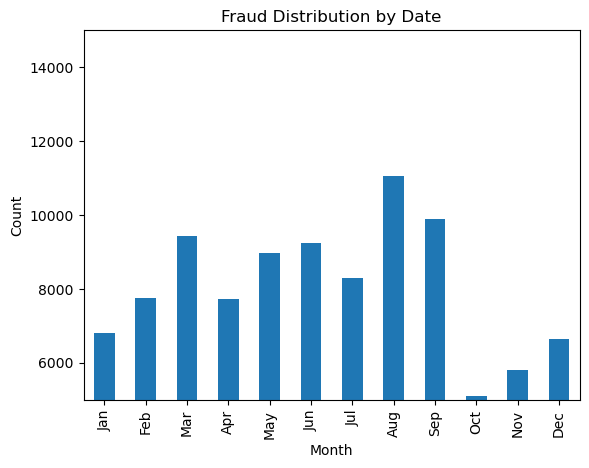

In [46]:
data.groupby('Month', sort = False).count()['Recnum'].plot(x = True, kind = 'bar', ylim = (5000, 15000), ylabel = 'Count', title= 'Fraud Distribution by Date')

In [47]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Daily Transactions Probability'}, xlabel='date'>

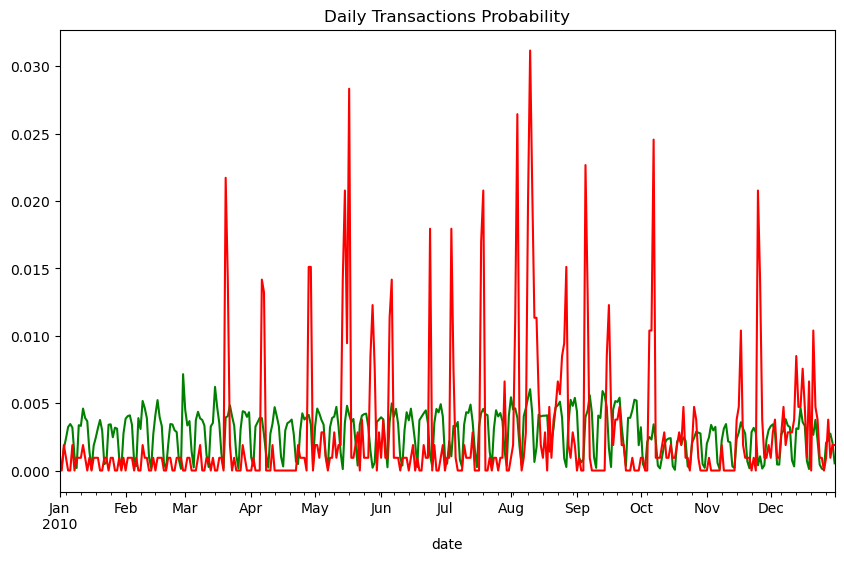

In [52]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 1)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Transactions Probability', color = 'green', figsize = (10, 6))
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 1)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

In [50]:
weekly_applications = data.assign(trx = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 7))\
    .count().trx
weekly_applications.plot(title = 'Weekly Transactions', figsize = (10, 6))

NameError: name 'numrecords' is not defined

In [53]:
weekly_applications.head(60)

NameError: name 'weekly_applications' is not defined

In [ ]:
weekly_applications['2017-12-31'] = weekly_applications['2017-12-24']
weekly_applications.plot(title = 'Weekly Applications')

KeyError: '2017-12-24'

<AxesSubplot:title={'center':'Weeky Applications'}, xlabel='date'>

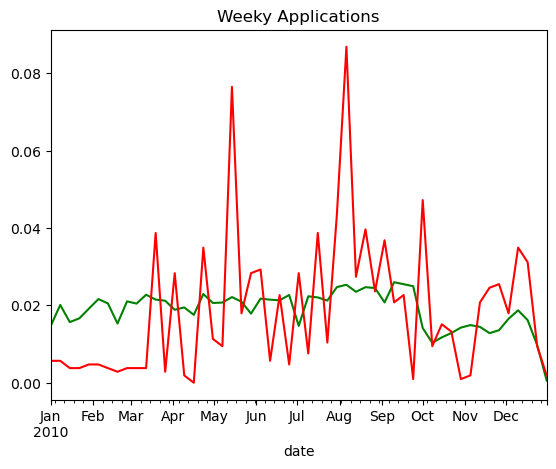

In [54]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 7)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weeky Applications', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 7)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

In [ ]:
len(data['ssn']) * 100 / numrecords

KeyError: 'ssn'

In [ ]:
len(data['ssn'].unique())

KeyError: 'ssn'

In [ ]:
data['ssn'].value_counts()

KeyError: 'ssn'

<AxesSubplot:title={'center':'Logarithmic distribution of Card numbers'}, xlabel='Card Number', ylabel='Frequency'>

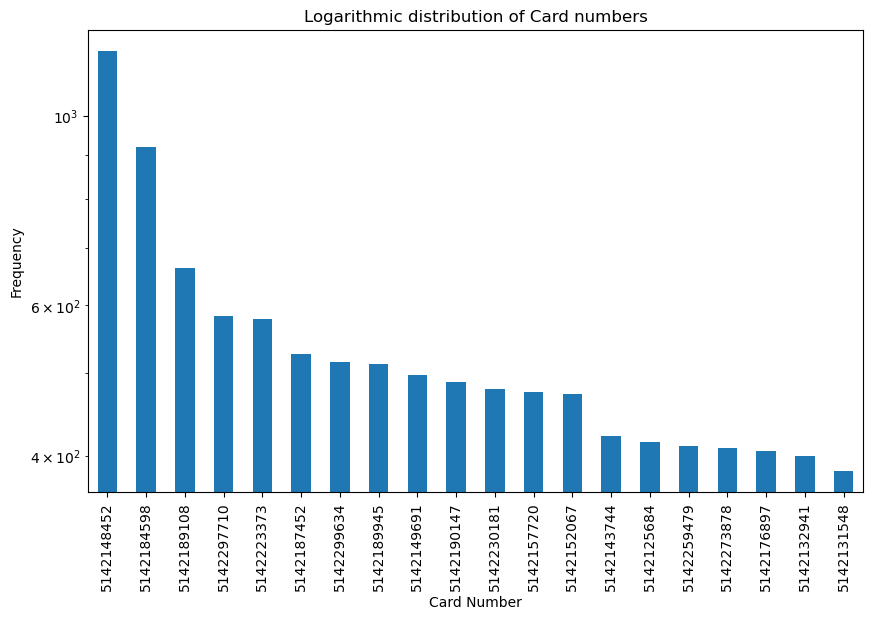

In [55]:
data['Cardnum'].value_counts().head(20).plot(kind='bar',logy=True, xlabel = 'Card Number', ylabel = 'Frequency', title='Logarithmic distribution of Card numbers', figsize=(10, 6))

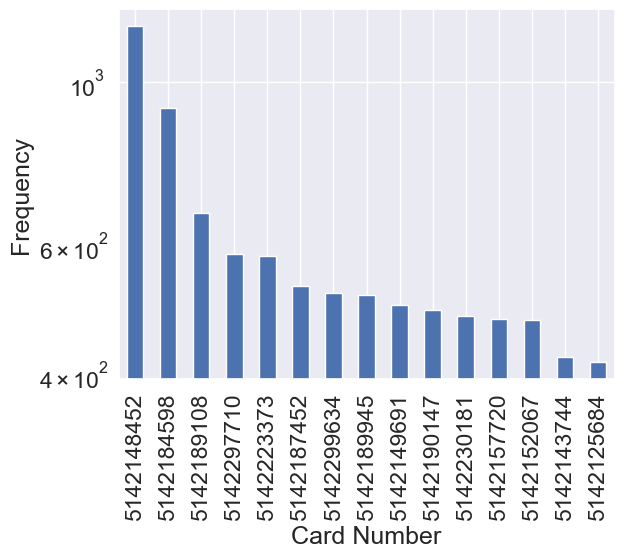

In [56]:
sns.set(font_scale=1.5)
data['Cardnum'].value_counts().head(15).plot(kind = 'bar', xlabel = 'Card Number', ylabel = 'Frequency')
plt.yscale('log')

In [ ]:
data[data['ssn'] == '999999999'].head(20)

KeyError: 'ssn'

In [ ]:
len(data[data['ssn'] == '999999999'])

KeyError: 'ssn'

In [ ]:
data.loc[data['ssn'] == '999999999', 'ssn'] = data.loc[data['ssn'] == '999999999', 'record']

KeyError: 'ssn'

In [ ]:
data['Merch state'].nunique()

227

<AxesSubplot:ylabel='Frequency'>

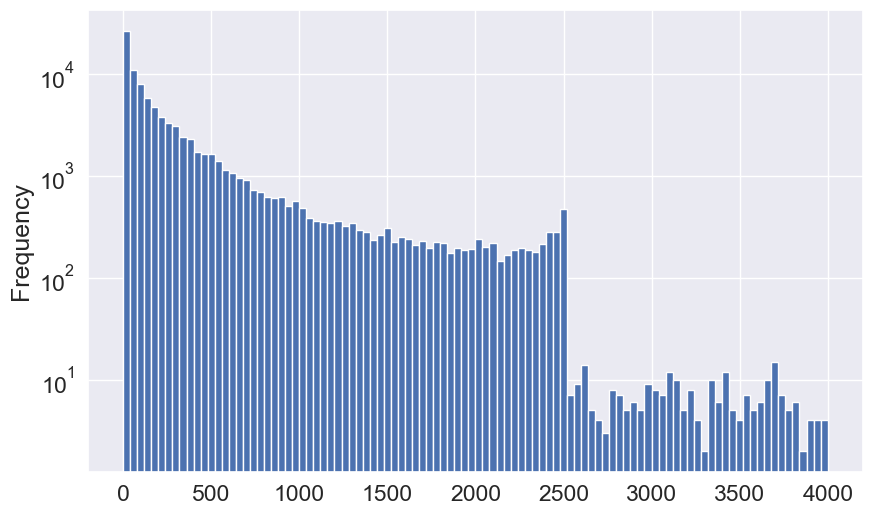

In [109]:
# data[(data['Amount'] < 4000)]['Amount'].sort_values(ascending=False).reset_index()['Amount'].value_counts(bins = bins).sort_values(ascending = False).plot(logy = True, figsize=(10,6))
data[(data['Amount'] < 4000)]['Amount'].sort_values(ascending=False).reset_index()['Amount'].plot(kind= 'hist', bins = 100, logy = True, figsize=(10,6))

<AxesSubplot:>

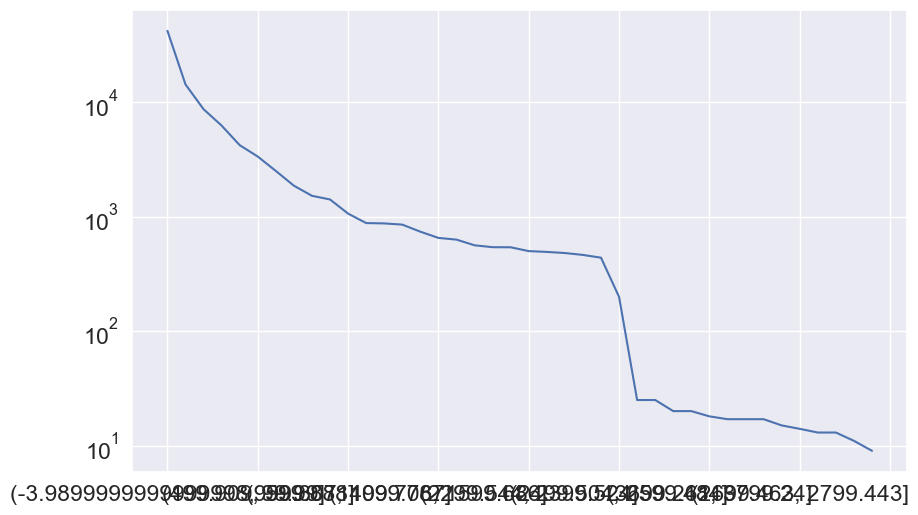

In [96]:
data[(data['Amount'] < 4000)]['Amount'].sort_values(ascending=False).reset_index()['Amount'].value_counts(bins = 40).sort_values(ascending = False).plot(logy = True, figsize=(10,6))

In [131]:
bins = np.arange(0, 4000, 40)
data[(data['Amount'] < 4000)]['Amount'].sort_values(ascending=False).reset_index()['Amount']

0        3999.20
1        3996.50
2        3982.77
3        3980.40
4        3952.25
          ...   
96262       0.08
96263       0.02
96264       0.01
96265       0.01
96266       0.01
Name: Amount, Length: 96267, dtype: float64

Text(0, 0.5, 'Frequency')

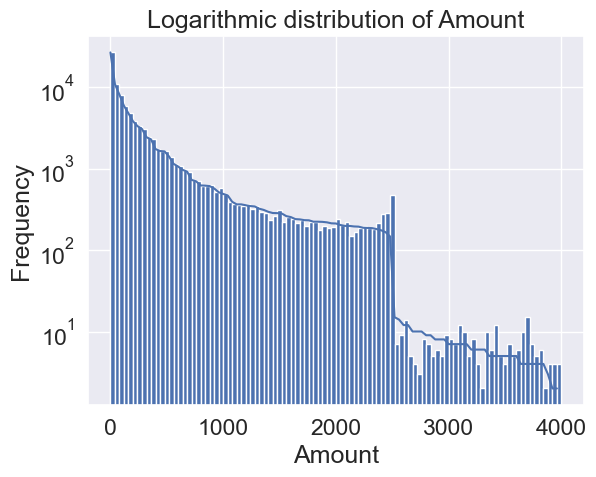

In [139]:
# fig, ax = plt.subplot()
bins = np.arange(0, 4000, 40)
plt.hist(data[(data['Amount'] < 4000)]['Amount'].sort_values(ascending=False).reset_index()['Amount'], bins = 100, log = True)
plt.plot(bins, data[(data['Amount'] < 4000)]['Amount'].sort_values(ascending=False).reset_index()['Amount'].value_counts(bins = 100).sort_values(ascending = False), color = 'b')
plt.title('Logarithmic distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

In [132]:
data['ssn'].value_counts().head(20).plot(kind='bar',logy=True, xlabel = 'Social Security Number (SSN)', ylabel = 'Frequency')

KeyError: 'ssn'

In [59]:
len(data['firstname']) * 100 / numrecords

KeyError: 'firstname'

In [60]:
len(data['firstname'].unique())

KeyError: 'firstname'

In [61]:
data['firstname'].value_counts()

KeyError: 'firstname'

<AxesSubplot:title={'center':'Merch Number Logarithmic Distribution'}, xlabel='Merch Number', ylabel='Frequency'>

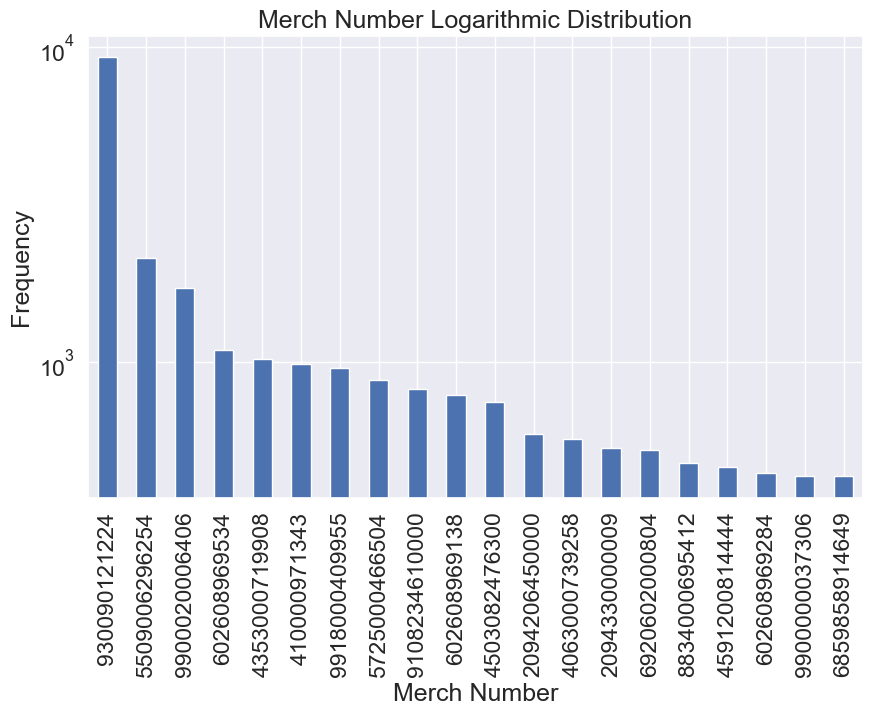

In [73]:
data['Merchnum'].value_counts().head(20).plot(kind='bar', logy = True,  xlabel = 'Merch Number', ylabel = 'Frequency', title = 'Merch Number Logarithmic Distribution', figsize= (10, 6))

In [63]:
len(data['lastname']) * 100 / numrecords

KeyError: 'lastname'

In [64]:
len(data['lastname'].unique())

KeyError: 'lastname'

In [65]:
data['lastname'].value_counts()

KeyError: 'lastname'

<AxesSubplot:title={'center':'Merch Description Distribution'}, xlabel='Merch Description', ylabel='Frequency'>

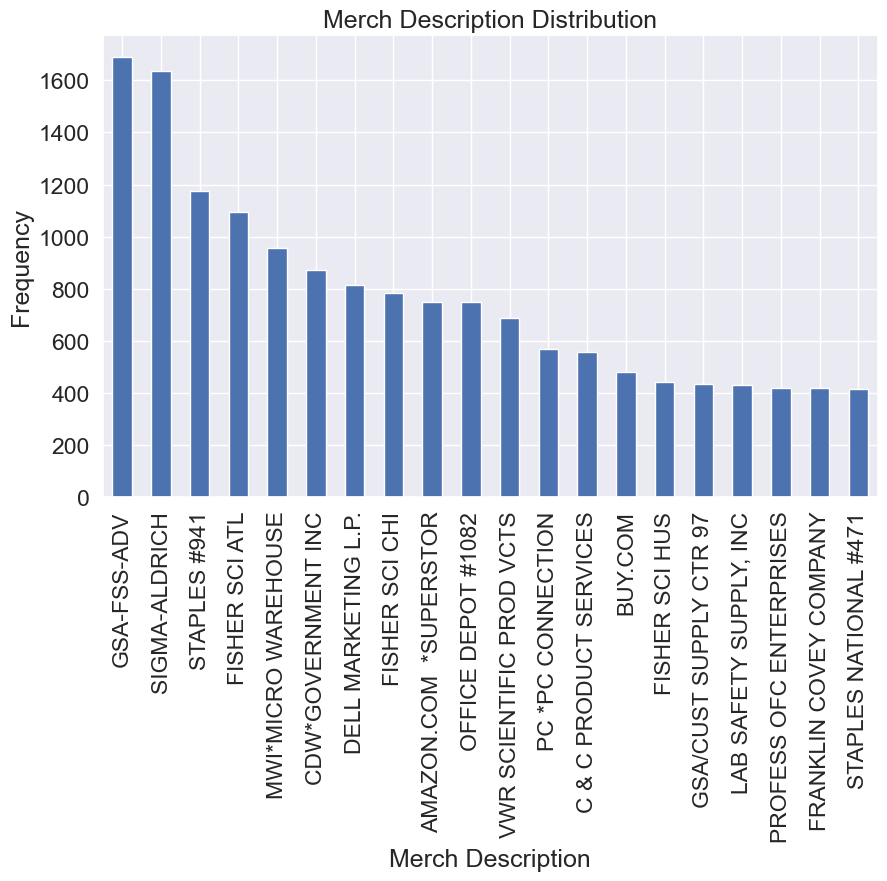

In [80]:
data['Merch description'].value_counts().head(20).plot(kind='bar', xlabel = 'Merch Description', ylabel = 'Frequency', title = 'Merch Description Distribution', figsize = (10, 6))

In [67]:
len(data['address']) * 100 / numrecords

KeyError: 'address'

In [68]:
len(data['address'].unique())

KeyError: 'address'

In [69]:
data['address'].value_counts()

KeyError: 'address'

<AxesSubplot:title={'center':'Merch State Logarithmic Distribution'}, xlabel='Merch State', ylabel='Frequency'>

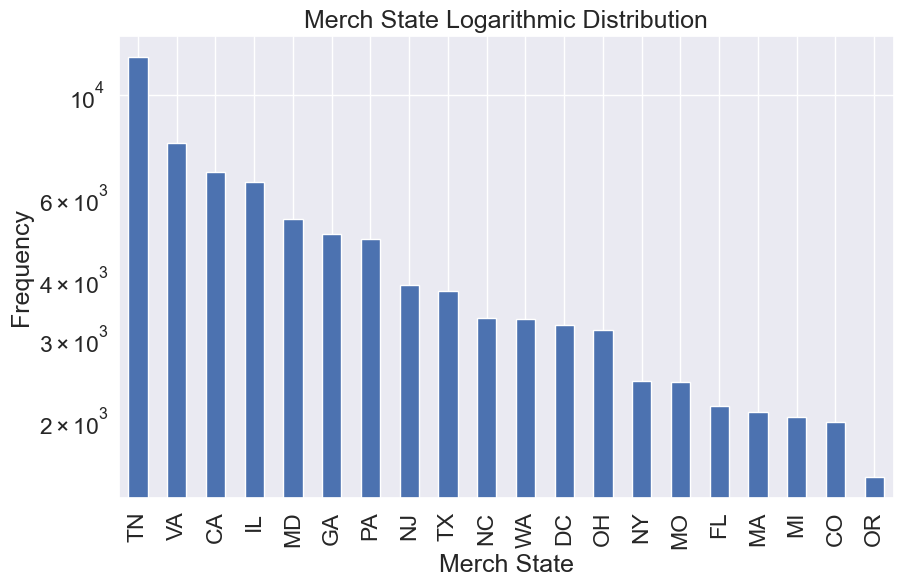

In [81]:
data['Merch state'].value_counts().head(20).plot(kind='bar',logy=True, xlabel = 'Merch State', ylabel = 'Frequency', title = 'Merch State Logarithmic Distribution', figsize = (10, 6))

In [71]:
data[data['address'] == '123 MAIN ST'].head(20)

KeyError: 'address'

In [72]:
len(data['zip5']) * 100 / numrecords

KeyError: 'zip5'

In [73]:
len(data['zip5'].unique())

KeyError: 'zip5'

In [74]:
data["Merch zip"] = data['Merch zip'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

<AxesSubplot:title={'center':'Merch zip Logarithmic Distribution'}, xlabel='Merch zip', ylabel='Frequency'>

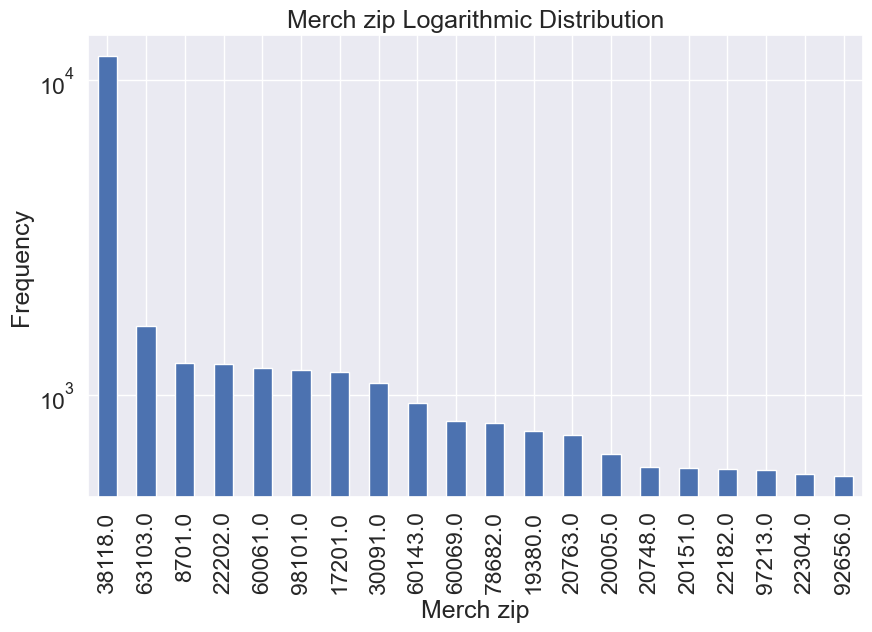

In [82]:
data['Merch zip'].value_counts().head(20).plot(kind='bar',logy=True, xlabel = 'Merch zip', ylabel = 'Frequency', title = 'Merch zip Logarithmic Distribution', figsize = (10, 6))

<AxesSubplot:title={'center':'Merch zip Logarithmic Distribution'}, xlabel='Merch zip', ylabel='Frequency'>

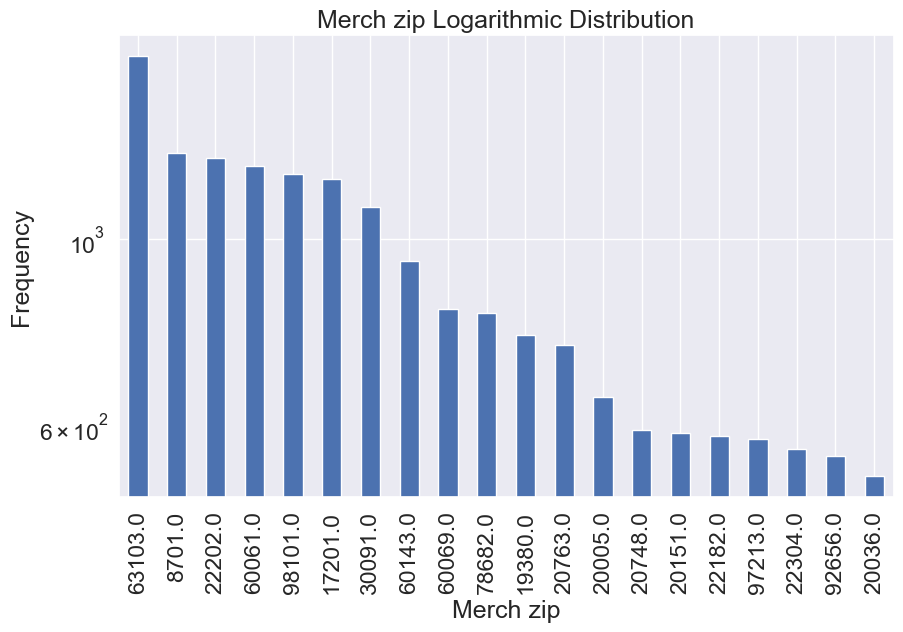

In [83]:
data['Merch zip'].value_counts().iloc[1:].head(20).plot(kind='bar',logy=True, xlabel = 'Merch zip', ylabel = 'Frequency', title = 'Merch zip Logarithmic Distribution', figsize = (10, 6))

In [77]:
data['fulladdress'] = data['address'] + ' ' + data['zip5'].astype('str')
# data = data.drop(columns = ['zip5', 'address'])

KeyError: 'address'

<AxesSubplot:title={'center':'Transaction type Logarithmic Distribution'}, xlabel='Transaction types', ylabel='Frequency'>

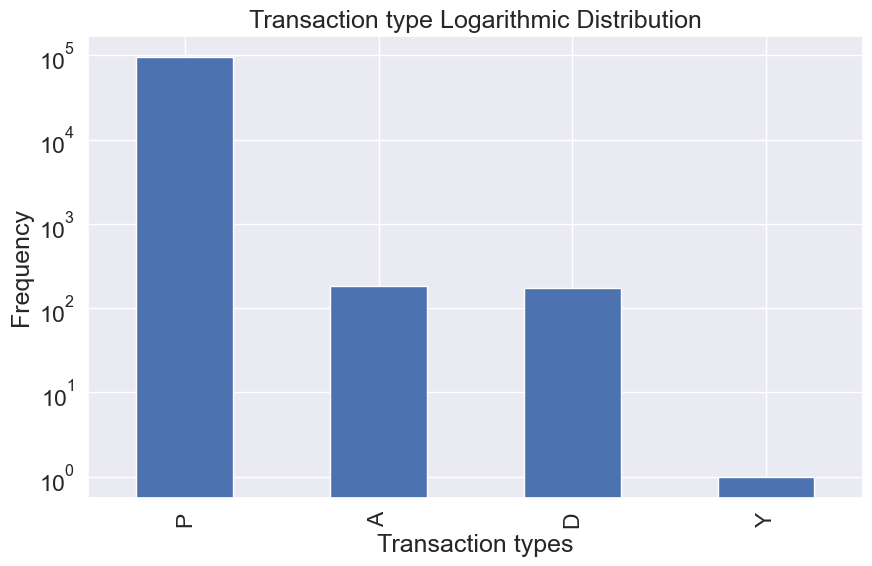

In [84]:
data['Transtype'].value_counts().head(20).plot(kind='bar',logy=True, xlabel = 'Transaction types', ylabel = 'Frequency', title = 'Transaction type Logarithmic Distribution', figsize = (10, 6))

In [79]:
old_address = [data.iloc[1247]['address'],data.iloc[2191]['address'],data.iloc[2529]['address']]
print(old_address)

KeyError: 'address'

In [ ]:
len(data[data['address'] == '123 MAIN ST'])

1079

In [80]:
data.loc[data['address'] == '123 MAIN ST', 'address'] = data.loc[data['address'] == '123 MAIN ST', 'record'].astype('str')

KeyError: 'address'

In [81]:
len(data[data['address'] == '123 MAIN ST'])

KeyError: 'address'

In [82]:
new_address = [data.iloc[1247]['address'],data.iloc[2191]['address'],data.iloc[2529]['address']]
print(new_address)

KeyError: 'address'

In [83]:
data['fulladdress'] = data['address'] + ' ' + data['zip5'].astype('str')
# data = data.drop(columns = ['zip5', 'address'])

KeyError: 'address'

In [84]:
data['fulladdress'].value_counts().head(20).plot(kind='bar',logy=True, xlabel = 'Full Address', ylabel = 'Frequency')

KeyError: 'fulladdress'

In [85]:
len(data['dob']) * 100 / numrecords

KeyError: 'dob'

In [ ]:
len(data['dob'].unique())

42673

In [ ]:
data['dob'].value_counts()

19070626    126568
19640318      4818
19760625      3723
19880628      1404
19740216       980
             ...  
19280730         5
19860313         5
19190223         5
19441127         5
19960904         5
Name: dob, Length: 42673, dtype: int64

<AxesSubplot:xlabel='Date of Birth', ylabel='Count'>

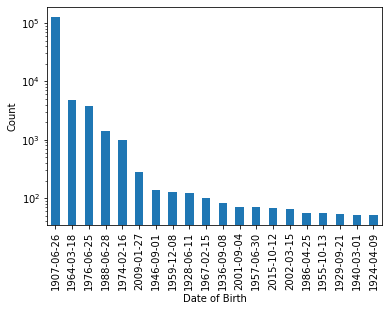

In [ ]:
data['dob'].dt.date.value_counts().head(20).plot(kind='bar',logy=True, xlabel = 'Date of Birth', ylabel = 'Count')

In [ ]:
data.loc[data['dob'] == 19070626, 'dob'] = data.loc[data['dob'] == 19070626, 'record']

<AxesSubplot:xlabel='Date of Birth', ylabel='Frequency'>

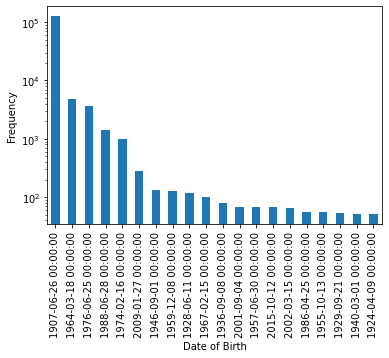

In [ ]:
data['dob'].value_counts().head(20).plot(kind='bar',logy=True, xlabel = 'Date of Birth', ylabel = 'Frequency' )

AttributeError: module 'datetime' has no attribute 'today'

In [11]:
len(data['homephone']) * 100 / numrecords

KeyError: 'homephone'

In [80]:
len(data['homephone'].unique())

28244

In [81]:
data['homephone'].value_counts()

9999999999    78512
6384782007      466
6035129044      360
2113738531      331
4024680535      198
              ...  
3450484388        1
5376503138        1
7106175831        1
5010200060        1
6271618925        1
Name: homephone, Length: 28244, dtype: int64

<AxesSubplot:>

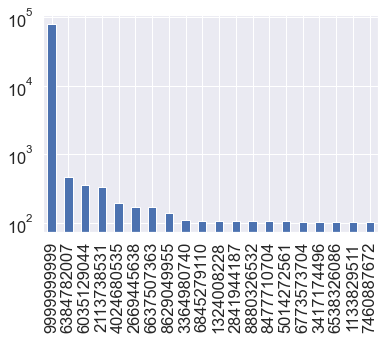

In [92]:
data['homephone'].value_counts().head(20).plot(kind='bar',logy=True)

In [100]:
data[data['homephone'] == '9999999999'].head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
17,18,2017-01-01,346374636,XRSSZZUXT,ETXZXJAJ,5719 UEZJT PL,51486,1950-01-10,9999999999,0
26,27,2017-01-01,735495403,EMSSTSXUA,STZRUXZM,9323 STRMS PL,51395,1988-11-11,9999999999,0
60,61,2017-01-01,780136117,UZTZEETU,ARUZTZM,5317 UTXME ST,37840,1973-11-29,9999999999,0
64,65,2017-01-01,999999999,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,1907-06-26,9999999999,0
145,146,2017-01-01,671506143,TXEMXZZM,SRTERSRA,5795 UMUTM BLVD,45077,1903-09-13,9999999999,0
149,150,2017-01-01,149112205,EZTERXZRA,EERMAXJU,2249 XXAU DR,27375,1984-12-06,9999999999,0
178,179,2017-01-01,507916615,EUEJUURAR,XUSMXRU,8314 XXMX DR,398,1972-04-16,9999999999,0
179,180,2017-01-01,106080337,SRARXRMRM,UTJMRJUX,8413 URUEU WY,15746,1907-06-26,9999999999,0
180,181,2017-01-01,291680381,MUSXJTSSX,EXAAJUT,9762 SXJXM LN,41694,1962-05-04,9999999999,0
200,201,2017-01-01,13382014,EAMSTRMT,RURSXSXX,372 SXTEA DR,42716,1907-06-26,9999999999,0


In [101]:
len(data[data['homephone'] == '9999999999'])

78512

In [102]:
data.loc[data['homephone'] == '9999999999', 'homephone'] = data.loc[data['homephone'] == '9999999999', 'record']

In [103]:
len(data[data['homephone'] == '9999999999'])

0

In [104]:
data.head(30)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1907-06-26,1797504115,0
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,1934-06-15,4164239415,1
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,1907-06-26,216537580,0
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,1944-04-30,132144161,0
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,1998-03-15,6101082272,0
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,1948-06-13,5742016319,0
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,1964-03-18,7697396312,0
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,1919-05-28,2727421586,0
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,1990-03-14,5520652307,0
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,1975-01-27,3749451123,0


<AxesSubplot:xlabel='Homephone', ylabel='Frequency'>

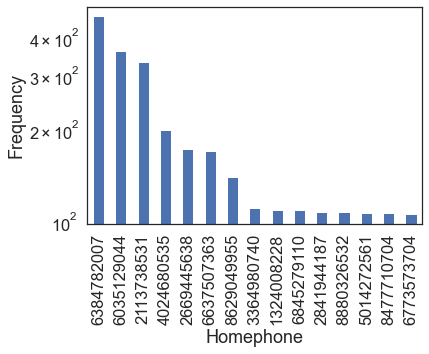

In [105]:
data['homephone'].value_counts().head(15).plot(kind='bar',logy=True, xlabel = 'Homephone', ylabel = 'Frequency')

In [94]:
sns.set_style(style = 'white')

In [95]:
data = data.drop(columns = 'fulladdress')
data.head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1907-06-26,1797504115,0
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,1934-06-15,4164239415,1
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,1907-06-26,216537580,0
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,1944-04-30,132144161,0
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,1998-03-15,6101082272,0
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,1948-06-13,5742016319,0
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,1964-03-18,7697396312,0
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,1919-05-28,2727421586,0
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,1990-03-14,5520652307,0
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,1975-01-27,3749451123,0


In [151]:
data.plot.pie(y = 'fraud_label')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001E0878A38B0> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:ylabel='Fraud Label'>

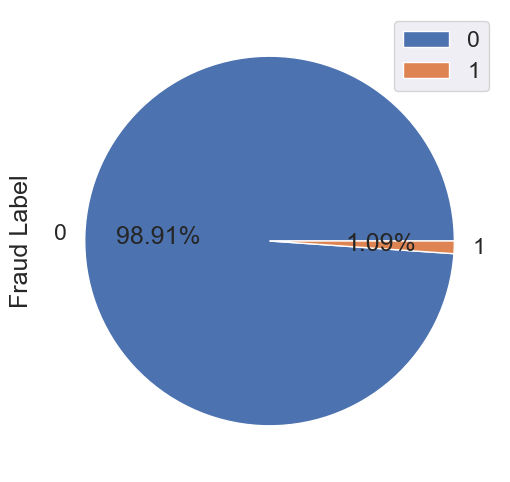

In [104]:
data.groupby('Fraud').count().plot(kind = 'pie', y = 'Recnum', ylabel = 'Fraud Label',autopct='%0.02f%%',  figsize = (6, 6))

In [ ]:
data

In [152]:
data.shape

(1000000, 11)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   record       1000000 non-null  int64         
 1   date         1000000 non-null  datetime64[ns]
 2   ssn          1000000 non-null  object        
 3   firstname    1000000 non-null  object        
 4   lastname     1000000 non-null  object        
 5   address      1000000 non-null  object        
 6   zip5         1000000 non-null  object        
 7   dob          1000000 non-null  datetime64[ns]
 8   homephone    1000000 non-null  object        
 9   fraud_label  1000000 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 76.3+ MB


In [92]:
data.describe()

,record,ssn,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,500000.500000,4.914150e+08,50073.333143,1.716682e+07,4.583635e+09,0.014393
std,288675.278933,2.934649e+08,28915.921546,6.353070e+06,3.076022e+09,0.119104
min,1.000000,1.100000e+01,2.000000,1.000000e+00,1.800000e+01,0.000000
25%,250000.750000,2.370395e+08,24992.000000,1.916092e+07,1.857659e+09,0.000000
50%,500000.500000,4.916291e+08,50492.000000,1.950090e+07,4.544521e+09,0.000000
75%,750000.250000,7.457676e+08,74496.000000,1.983032e+07,7.254188e+09,0.000000
max,1000000.000000,9.999999e+08,99999.000000,2.016103e+07,9.999318e+09,1.000000


In [93]:
# data.to_csv('applications clean.csv', index = False)

In [94]:
print('duration: ', dt.datetime.now()-start_time)

duration:  0:00:20.233737
